In [4]:
import numpy #а
from matplotlib import pyplot
%matplotlib inline

In [5]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [7]:
#начальные условия
z0 = 100.  #высота
b0  = 10.  #нормальная скорость
zt = 100.
g  = 9.81
u = numpy.array([z0, b0])

In [14]:
#пустой массив для переменных
z = numpy.zeros(N)
z[0] = z0  
z

array([ 100.,    0.,    0., ...,    0.,    0.,    0.])

In [15]:
def f(u):
    return numpy.array([u[1], g*(1-u[0]/zt)])

In [16]:
def euler_step(u, f, dt):
    """
    Возвращает n+1-ый шаг с использованием метода Эйлера
    
    u: массив переменных типа float
    f: сама функция
    dt: шаг по времени
    """
    return u + dt * f(u)

In [17]:
for n in range(1,N):
    u = euler_step(u, f, dt)
    z[n] = u[0]

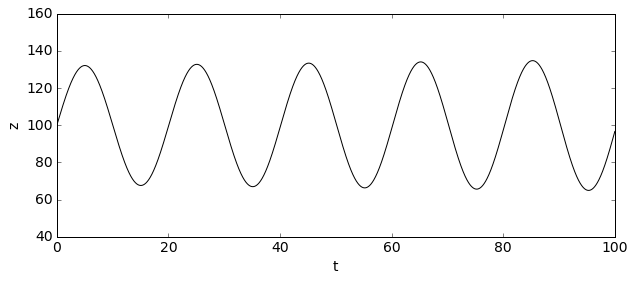

In [21]:
#рисуем график
pyplot.figure(figsize=(10,4))   #размер графика
pyplot.ylim(40,160)             #пределы по оси y
pyplot.tick_params(axis='both', labelsize=14) #размер надписей 
pyplot.xlabel('t', fontsize=14) #ось t
pyplot.ylabel('z', fontsize=14) #ось z
pyplot.plot(t,z, 'k-');

In [24]:
# массив шагов по времени
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# массив решений
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T, N)

    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    #расчет решения методом Эйлера
    for n in range(1,N):
        u = euler_step(u, f, dt)
        z[n] = u[0]   #сохранить значение n+1
    
    z_values[i] = z.copy()    #сохранить решение на слое i

In [25]:
def get_error(z, dt):
    
    """
    Возвращает ошибку по норме L1
    
    z: массив переменных типа float
    dt: шаг по времени
    """
    
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    #аналитическое решение
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [26]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    #вызов функции get_error
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

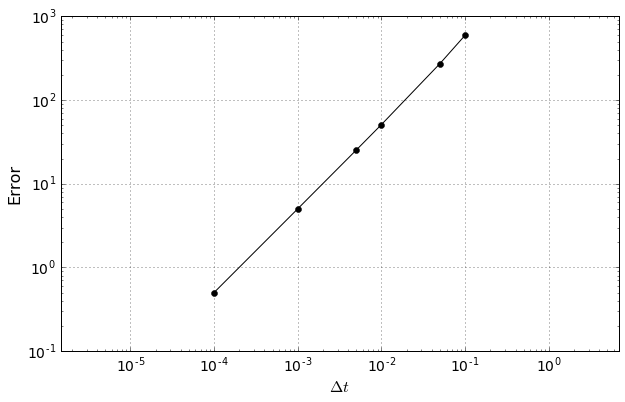

In [29]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #размер надписей
pyplot.grid(True)                         #включить сетку
pyplot.xlabel('$\Delta t$', fontsize=16)  #ось dt
pyplot.ylabel('Error', fontsize=16)       #ось Error
pyplot.loglog(dt_values, error_values, 'ko-')  #логарифмический мастшаб
pyplot.axis('equal')                      #отмасштабировать оси

In [30]:
numpy.loadtxt

<function numpy.lib.npyio.loadtxt>